# AllLife Credit Card Customer Segmentation

**Background:** AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

**Objective:** To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

**Key Questions:**
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers? 

**Data Description:**
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

In [1]:
# Impot necessary packages

import numpy as np   
import pandas as pd  

import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 

from scipy.stats import zscore
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


from sklearn.decomposition import PCA



Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read Data
data = pd.read_excel('Credit Card Customer Data.xlsx')
data.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

#### 1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

In [3]:
# Data Shape (rows, columns)
data.shape

(660, 7)

In [4]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
# Data Types
data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [6]:
# Data Distribution and Ranges
data.describe().T

count          mean           std      min       25%  \
Sl_No                660.0    330.500000    190.669872      1.0    165.75   
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total_visits_bank    660.0      2.403030      1.631813      0.0      1.00   
Total_visits_online  660.0      2.606061      2.935724      0.0      1.00   
Total_calls_made     660.0      3.583333      2.865317      0.0      1.00   

                         50%       75%       max  
Sl_No                  330.5    495.25     660.0  
Customer Key         53874.5  77202.50   99843.0  
Avg_Credit_Limit     18000.0  48000.00  200000.0  
Total_Credit_Cards       5.0      6.00      10.0  
Total_visits_bank        2.0      4.00       5.0  
Total_visits_online      2.0      4.00      15.0  
Total_calls_made         3.0      5.00      10.0

In [7]:
# Null Values
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
# Duplicates
data.duplicated().sum()

0

In [9]:
# Customers with Duplicate Customer Key
data['Customer Key'].duplicated().sum()

5

In [10]:
data[data.iloc[:,1].duplicated()]

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
332    333         47437             17000                   7   
398    399         96929             67000                   6   
432    433         37252             59000                   6   
541    542         50706             60000                   7   
632    633         97935            187000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
332                  3                    1                 0  
398                  2                    2                 2  
432                  2                    1                 2  
541                  5                    2                 2  
632                  1                    7                 0

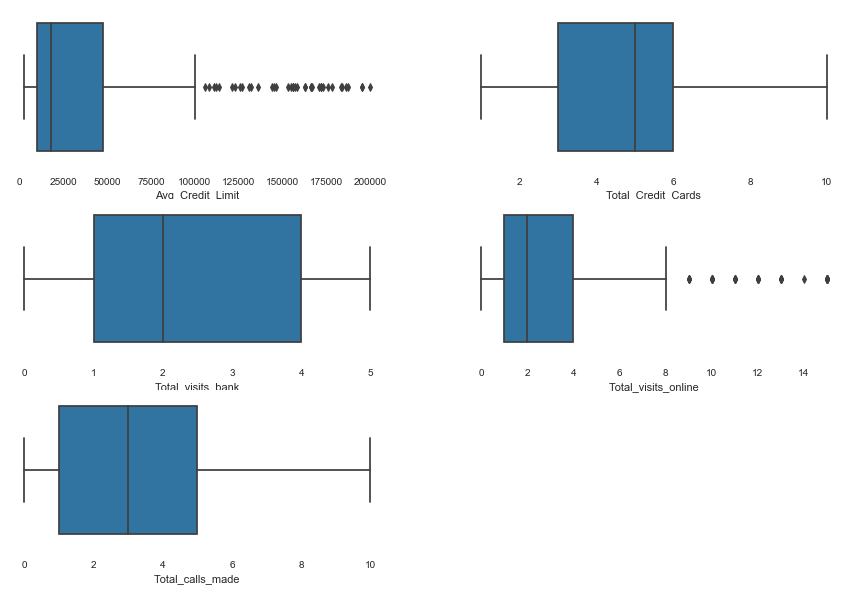

In [11]:
# Univariate Analysis
plt.figure(figsize=(15,10))
pos = 1
for i in data.drop(['Sl_No', 'Customer Key'], axis=1).columns:
    plt.subplot(3, 2, pos)
    sns.boxplot(data[i])
    pos += 1

**Findings:**
- Avg_Credit_Limit ranges between 3K to 100K (and some outliers of up to 200K) with IQR of 10K to 48K
- Total_Credit_Cards ranges between 0 to 10 cards per customer with IQR of 3 to 6 cards per customer
- Total_visits_bank ranges between 0 and 5 visits with IQR of 1 to 4
- Total_visits_online ranges between 0 and 8 visits with IQR of 1 to 4 (with some outliers)
- Total_calls_made ranges between 0 and 10 calls with IQR of 1 to 5

In [12]:
# Comprehensive EDA Report
ProfileReport(data, title='Credit Card Customer Data Profile Report', explorative=True)

#### 2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

Throughout the notebook

#### 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

A key step tp prepare the data for clustering is to perform feature selection and data scaling

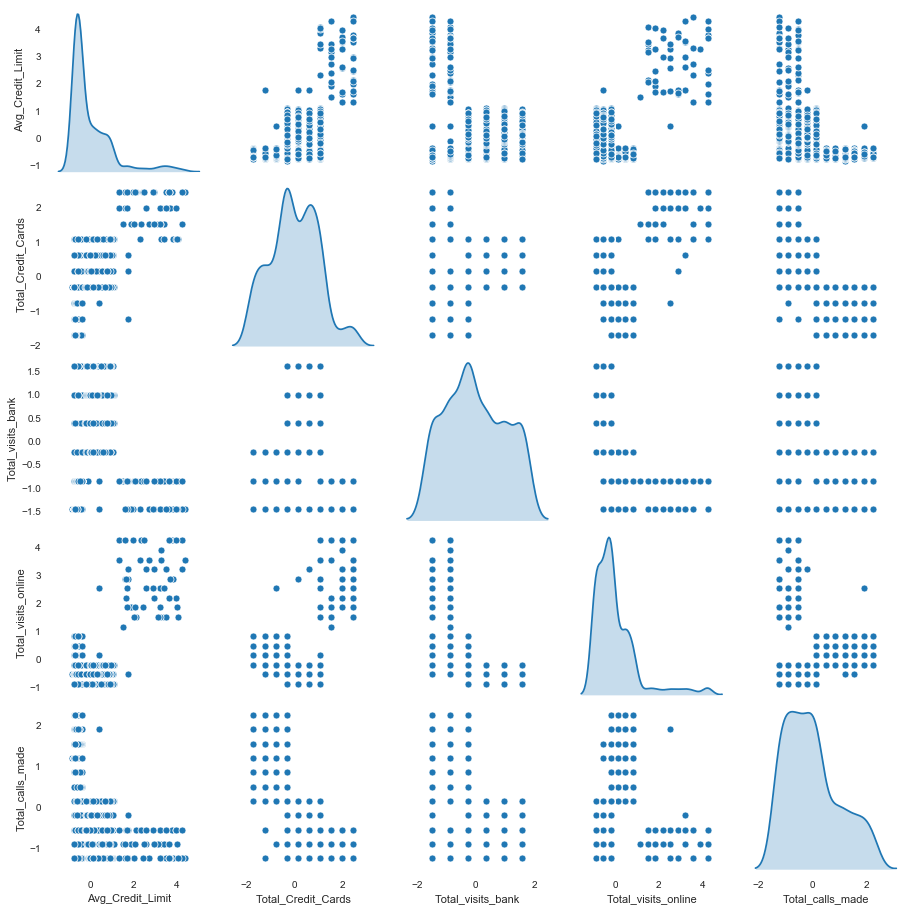

In [13]:
# Selecting Features and Scaling the data
dataAttr=data.iloc[:,2:]
dataScaled=dataAttr.apply(zscore)
sns.pairplot(dataScaled,diag_kind='kde');

Conduct the elbow test to determine the optimal number of groups/clusters that should be used in K-Means clustering based on data attributes.

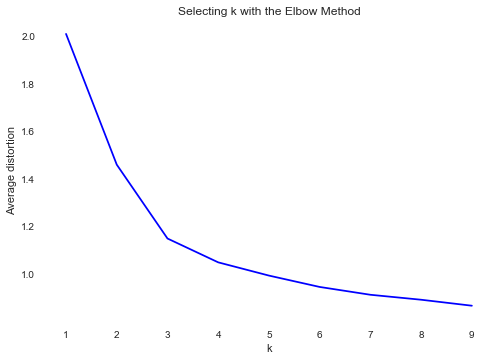

In [14]:
# Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dataScaled)
    prediction=model.predict(dataScaled)
    meanDistortions.append(sum(np.min(cdist(dataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-');
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

Though the bend is not coming out clearly as there are many bends (most likely at 3), let us look at 2 clusters, 3 clusters and 4 clusters.

In [15]:
# Let us first start with K = 2
k2_model=KMeans(2)
k2_model.fit(dataScaled)
prediction=k2_model.predict(dataScaled)

# Append the prediction 
data["GROUP"] = prediction
dataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  GROUP  
0                  1                    1                 0      1  
1                  0                   10                 9      0  
2                  1                    3                 4      1  
3                  1                    1                 4      1  
4                  0                   12                 3      1

In [16]:
k2_dataClust = data.groupby(['GROUP'])
k2_dataClust.mean()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
GROUP                                                                   
0      117.857143  55239.830357      12174.107143            2.410714   
1      439.747706  55090.896789      46082.568807            5.885321   

       Total_visits_bank  Total_visits_online  Total_calls_made  
GROUP                                                            
0               0.933036             3.553571          6.870536  
1               3.158257             2.119266          1.894495

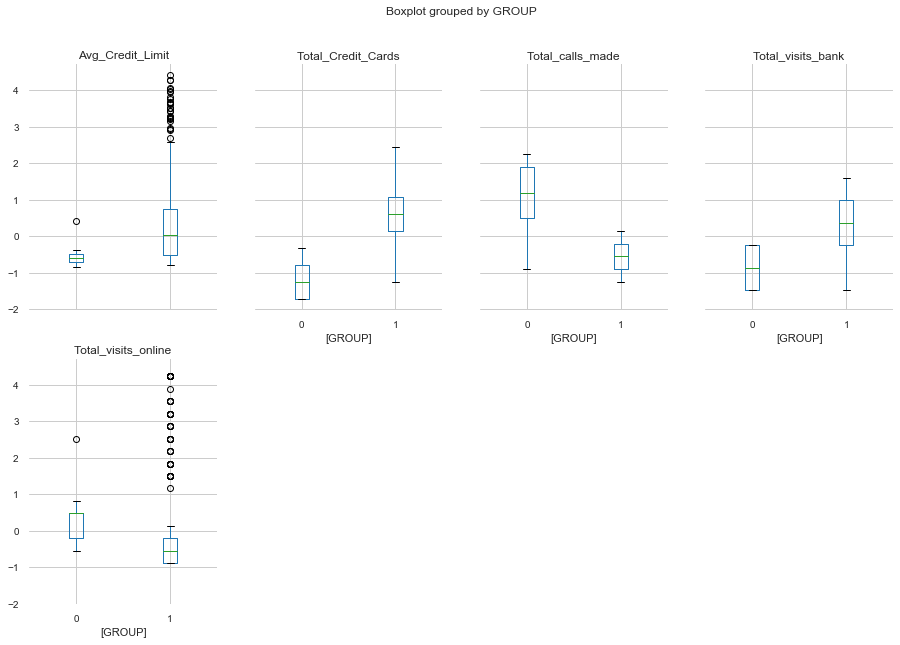

In [17]:
dataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));

With k=2, it can be seen that 
- The 1st Cluster is characterized by lower Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank through calls more than they visit or use online channels
- The 2nd Cluster is characterized by hihger Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank by direct visits compared to calls and online channels

In [18]:
# Check the number of data in each cluster
k2_labels = k2_model.labels_
k2_counts = np.bincount(k2_labels[k2_labels>=0])
print(k2_counts)

[224 436]


In [19]:
# Let us check K = 3
k3_model=KMeans(3)
k3_model.fit(dataScaled)
prediction=k3_model.predict(dataScaled)

# Append the prediction 
data["GROUP"] = prediction
dataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  GROUP  
0                  1                    1                 0      0  
1                  0                   10                 9      1  
2                  1                    3                 4      0  
3                  1                    1                 4      0  
4                  0                   12                 3      2

In [20]:
k3_dataClust = data.groupby(['GROUP'])
k3_dataClust.mean()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
GROUP                                                                   
0      417.528497  54881.329016      33782.383420            5.515544   
1      117.857143  55239.830357      12174.107143            2.410714   
2      611.280000  56708.760000     141040.000000            8.740000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
GROUP                                                            
0               3.489637             0.981865          2.000000  
1               0.933036             3.553571          6.870536  
2               0.600000            10.900000          1.080000

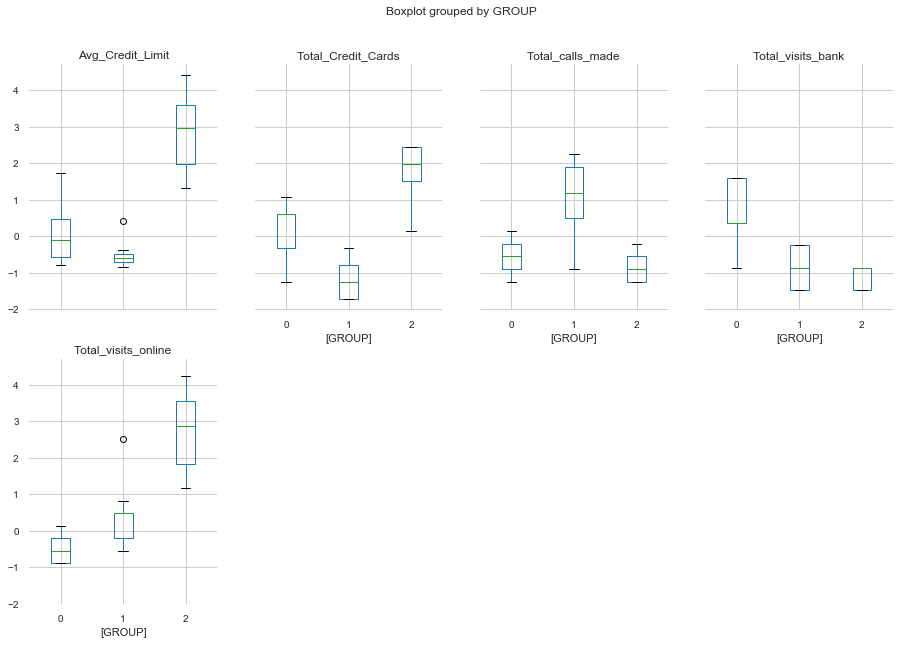

In [21]:
dataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));

With k=3, it can be seen that 
- The 1st Cluster is characterized by a moderate Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank through visits more than they call or use online channels
- The 2nd Cluster is characterized by a low Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank mainly by calls followd by direct visits then online channels.
- The 3rd Cluster is characterized by a relatively hihg Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank by using online channles then calls and followed by direct visits.

In [22]:
# Check the number of data in each cluster
k3_labels = k3_model.labels_
k3_counts = np.bincount(k3_labels[k3_labels>=0])
print(k3_counts)

[386 224  50]


In [23]:
# Let us check K = 4
k4_model=KMeans(4)
k4_model.fit(dataScaled)
prediction=k4_model.predict(dataScaled)

# Append the prediction 
data["GROUP"] = prediction
dataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  GROUP  
0                  1                    1                 0      0  
1                  0                   10                 9      1  
2                  1                    3                 4      0  
3                  1                    1                 4      0  
4                  0                   12                 3      2

In [24]:
k4_dataClust = data.groupby(['GROUP'])
k4_dataClust.mean()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
GROUP                                                                   
0      417.538071  53988.725888      36152.284264            5.538071   
1      118.349776  55319.937220      12161.434978            2.408072   
2      611.280000  56708.760000     141040.000000            8.740000   
3      415.363158  55714.684211      31226.315789            5.478947   

       Total_visits_bank  Total_visits_online  Total_calls_made  
GROUP                                                            
0               2.482234             0.954315          2.055838  
1               0.937220             3.565022          6.896861  
2               0.600000            10.900000          1.080000  
3               4.515789             1.010526          1.936842

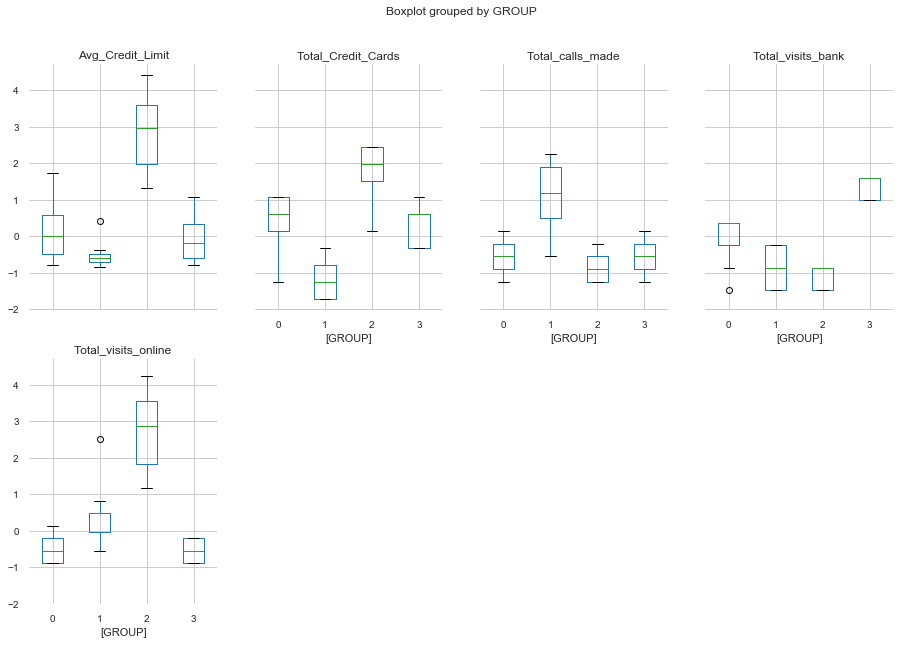

In [25]:
dataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10));

With k=4, it can be seen that 
- The 1st Cluster is characterized by a moderate Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank relatively equally through direct visits, call or online channels.
- The 2nd Cluster is characterized by a low Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank mainly by calls followd by direct visits then online channels.
- The 3rd Cluster is characterized by a relatively hihg Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank by using online channles then calls and followed by direct visits.
- The 4th Cluster is characterized by a moderate Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank through direct visits more frequently, then using call or online channels.

In [26]:
# Check the number of data in each cluster
k4_labels = k4_model.labels_
k4_counts = np.bincount(k4_labels[k4_labels>=0])
print(k4_counts)

[197 223  50 190]


#### 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

Hierarchical Clustering with Average Linkage

In [27]:
model_avg_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model_avg_linkage.fit(dataScaled)
dataAttr_avg_linkage = dataAttr.copy()
dataAttr_avg_linkage['labels_avg_linkage'] = model_avg_linkage.labels_
dataAttr_avg_linkage.head(10)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   
5             20000                   3                  0   
6            100000                   5                  0   
7             15000                   3                  0   
8              5000                   2                  0   
9              3000                   4                  0   

   Total_visits_online  Total_calls_made  labels_avg_linkage  
0                    1                 0                   0  
1                   10                 9                   0  
2                    3                 4                   0  
3                    1                 4                   0  
4                   12                 3                   1  
5                    1                 8                   0  
6                   11                 2                   1  
7                    1                 1                   0  
8                    2                 2                   0  
9                    1                 7                   0

In [28]:
dataClust_avg_linkage = dataAttr_avg_linkage.groupby(['labels_avg_linkage'])
dataClust_avg_linkage.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels_avg_linkage                                                            
0                       23414.285714            3.876190           1.661905   
1                      141040.000000            8.740000           0.600000   
2                       31226.315789            5.478947           4.515789   

                    Total_visits_online  Total_calls_made  
labels_avg_linkage                                         
0                              2.340476          4.626190  
1                             10.900000          1.080000  
2                              1.010526          1.936842

In [29]:
Z_avg = linkage(dataScaled, metric='euclidean', method='average')
c_avg, coph_dists_avg = cophenet(Z_avg , pdist(dataScaled))

c_avg

0.9201822814993511

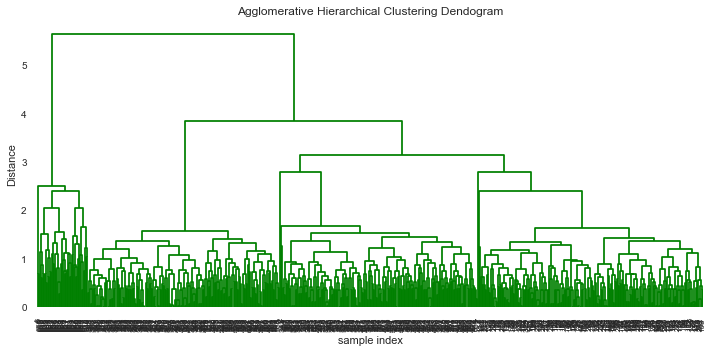

In [30]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_avg, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

**Finding:** From the dendrogram above, it can be condluded that the best number of clusters is 3 

Hierarchical Clustering with Ward Linkage

In [31]:
model_ward_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model_ward_linkage.fit(dataScaled)
dataAttr_ward_linkage = dataAttr.copy()
dataAttr_ward_linkage['labels_ward_linkage'] = model_ward_linkage.labels_
dataAttr_ward_linkage.head(10)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   
5             20000                   3                  0   
6            100000                   5                  0   
7             15000                   3                  0   
8              5000                   2                  0   
9              3000                   4                  0   

   Total_visits_online  Total_calls_made  labels_ward_linkage  
0                    1                 0                    0  
1                   10                 9                    0  
2                    3                 4                    0  
3                    1                 4                    0  
4                   12                 3                    2  
5                    1                 8                    0  
6                   11                 2                    2  
7                    1                 1                    0  
8                    2                 2                    0  
9                    1                 7                    0

In [32]:
dataClust_ward_linkage = dataAttr_ward_linkage.groupby(['labels_ward_linkage'])
dataClust_ward_linkage.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels_ward_linkage                                                            
0                        23414.285714            3.876190           1.661905   
1                        31226.315789            5.478947           4.515789   
2                       141040.000000            8.740000           0.600000   

                     Total_visits_online  Total_calls_made  
labels_ward_linkage                                         
0                               2.340476          4.626190  
1                               1.010526          1.936842  
2                              10.900000          1.080000

In [33]:
Z_ward = linkage(dataScaled, metric='euclidean', method='ward')
c_ward, coph_dists_ward = cophenet(Z_ward , pdist(dataScaled))

c_ward

0.8143563687650643

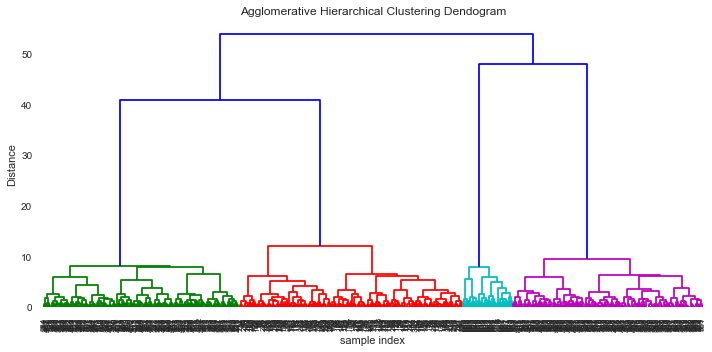

In [34]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_ward, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### 5. Calculate average silhouette score for both methods.(5 marks)

In [36]:
#max_d = 5
clusters_avg = fcluster(Z_avg, 5, criterion='distance')
#print(clusters_avg)
clusters_ward = fcluster(Z_ward, 52, criterion='distance')
#print(clusters_ward)


# Calculate Avg Silhoutte Score
print(silhouette_score(dataScaled,clusters_avg))
print(silhouette_score(dataScaled,clusters_ward))

0.5012043741051364
0.41851307128768933


Silhouette Score is better when closer 1 and worse when closer to -1. here, it is not so great for both linkage methods.

#### 6. Compare K-means clusters with Hierarchical clusters. (5 marks)

Both methods give an indication of the number of clusters in the dataset and the ideal number seems to be 3 clusters.
For K-Means, K = 3 is the used one and for Hierarchical, average linkage is used with euclidean distance which gives a silhouette_score of 0.50

#### 7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)
**Key Questions:**
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers? 

The number of clusters in the dataset seems to be 3 and the charactersitics of each cluster have been discussed earlier:

With k=3, it can be seen that 
- The 1st Cluster is characterized by a moderate Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank through visits more than they call or use online channels
- The 2nd Cluster is characterized by a low Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank mainly by calls followd by direct visits then online channels.
- The 3rd Cluster is characterized by a relatively hihg Avg_Credit_Limit and Total_Credit_cards, and these customers tend to contact the bank by using online channles then calls and followed by direct visits.

Recommendation:

- The bank should focus more on improving online channels for high Avg_Credit_Limit and Total_Credit_cards customers and focus more on improving service delivery via calls and direct visits for low to moderate Avg_Credit_Limit and Total_Credit_cards.

- Selling products should be more aligned with the needs as shown above in terms of limits and number of credit cards.